In [1]:
import pandas as pd
data = pd.read_csv('games_data.csv')
data.head(5)

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [3]:
data.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [4]:
data.shape

(81312, 20)

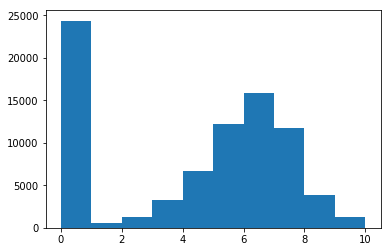

In [8]:
# Import matplotlib
import matplotlib.pyplot as plt

# Make a histogram of all the ratings in the average_rating column.
plt.hist(data["average_rating"])

# Show the plot.
plt.show()

In [6]:
# Print the first row of all the games with zero scores.
# The .iloc method on dataframes allows us to index by position.
print(data[data["average_rating"] == 0].iloc[0])
# Print the first row of all the games with scores greater than 0.
print(data[data["average_rating"] > 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

In [10]:
# Remove any rows without user reviews.
data_1 = data[data["users_rated"] > 0]
# Remove any rows with missing values.
data_2 = data_1.dropna(axis=0)

In [12]:
#To identify set of games(clustering)
from sklearn.cluster import KMeans

# Initialize the model with 2 parameters -- number of clusters and random state.
kmeans_model = KMeans(n_clusters=5, random_state=1)
# Get only the numeric columns from games.
data_3 = data_2._get_numeric_data()
# Fit the model using the good columns.
kmeans_model.fit(data_3)
# Get the cluster assignments.
labels = kmeans_model.labels_
labels[:10]


array([4, 3, 3, 1, 4, 1, 3, 2, 2, 2], dtype=int32)

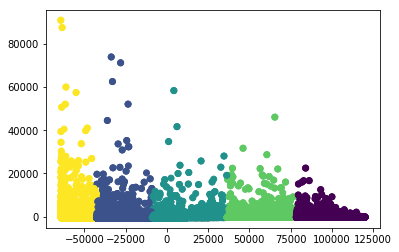

In [13]:
#plotting clusters using PCA(2-dimension)
from sklearn.decomposition import PCA

# Create a PCA model.
pca_2 = PCA(2)
# Fit the PCA model on the numeric columns from earlier.
plot_columns = pca_2.fit_transform(data_3)
# Make a scatter plot of each game, shaded according to cluster assignment.
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
# Show the plot.
plt.show()

In [14]:
data_3.corr()["average_rating"]


id                      0.304201
yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

In [15]:
# Get all the columns from the dataframe.
columns = data_3.columns.tolist()
# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating", "type", "name"]]

# Store the variable we'll be predicting on.
target = "average_rating"

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_3[columns], data_3[target], test_size=0.20, random_state=42)

In [18]:
X_train.shape

(45515, 16)

In [19]:
X_test.shape

(11379, 16)

In [20]:
#predicting average rating
from sklearn.linear_model import LinearRegression

# Initialize the model class.
model = LinearRegression()
# Fit the model to the training data.
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error

# Generate our predictions for the test set.
predictions = model.predict(X_test)

# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, y_test)

1.8656579048387016

In [26]:
#testing on training data itself--checking for overfitting
train_predict = model.predict(X_train)
mean_squared_error(train_predict,y_train)

1.8387178412134124

In [27]:
##using Rforest
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with some parameters.
model2 = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
# Fit the model to the data.
model2.fit(X_train, y_train)
# Make predictions.
predictions2 = model2.predict(X_test)
# Compute the error.
mean_squared_error(predictions2, y_test)

1.4282295546889745